In [33]:
import numpy as np
import pandas as pd

! pip install requests

In [34]:
import requests

In [35]:
# importing the countries.
url = "https://api.worldbank.org/countries?format=json&per_page=300"

response = requests.get(url)
response.status_code

200

In [36]:
data = response.json()
print(data[0])
print(len(data))

# 1- metadata
# 2 -Actual data

{'page': 1, 'pages': 1, 'per_page': '300', 'total': 296}
2


In [37]:
countries= data[1]
countries= pd.DataFrame(countries)

In [38]:
countries["incomeLevel"][6]

{'id': 'UMC', 'iso2code': 'XT', 'value': 'Upper middle income'}

In [39]:
countries["region"]= countries["region"].apply(lambda x:x["value"])

In [40]:
countries["incomeLevel"]= countries["incomeLevel"].apply(lambda x:x["value"])

In [41]:
countries["lendingType"]= countries["lendingType"].apply(lambda x:x["value"])

In [42]:
countries.drop(columns=["adminregion","adminregion"], inplace=True)

In [43]:
countries.drop(columns=["capitalCity"], inplace=True)

In [44]:
countries["region"].unique()

array(['Latin America & Caribbean ', 'Aggregates',
       'Middle East, North Africa, Afghanistan & Pakistan',
       'Sub-Saharan Africa ', 'Europe & Central Asia',
       'East Asia & Pacific', 'South Asia', 'North America'], dtype=object)

In [45]:
countries.rename(columns={"iso2Code":"country_id"}, inplace=True)

In [46]:
countries[countries["region"]=="Aggregates"]

,id,country_id,name,region,incomeLevel,lendingType,longitude,latitude
1,AFE,ZH,Africa Eastern and Southern,Aggregates,Aggregates,Aggregates,,
3,AFR,A9,Africa,Aggregates,Aggregates,Aggregates,,
4,AFW,ZI,Africa Western and Central,Aggregates,Aggregates,Aggregates,,
8,ARB,1A,Arab World,Aggregates,Aggregates,Aggregates,,
18,BEA,B4,East Asia & Pacific (IBRD-only countries),Aggregates,Aggregates,Aggregates,,
...,...,...,...,...,...,...,...,...
269,TSA,T5,South Asia (IDA & IBRD),Aggregates,Aggregates,Aggregates,,
270,TSS,T6,Sub-Saharan Africa (IDA & IBRD countries),Aggregates,Aggregates,Aggregates,,
278,UMC,XT,Upper middle income,Aggregates,Aggregates,Aggregates,,
288,WLD,1W,World,Aggregates,Aggregates,Aggregates,,


In [47]:
# code for indicators
base_url="https://api.worldbank.org/v2/indicators?format=json"
response= requests.get(base_url)
response.status_code

200

In [48]:
indicators_data = response.json()

In [49]:
indicators_data[0]

{'page': 1, 'pages': 587, 'per_page': '50', 'total': 29323}

In [50]:
indicators_data[1]

[{'id': '1.0.HCount.1.90usd',
  'name': 'Poverty Headcount ($1.90 a day)',
  'unit': '',
  'source': {'id': '37', 'value': 'LAC Equity Lab'},
  'sourceNote': 'The poverty headcount index measures the proportion of the population with daily per capita income (in 2011 PPP) below the poverty line.',
  'sourceOrganization': 'LAC Equity Lab tabulations of SEDLAC (CEDLAS and the World Bank).',
  'topics': [{'id': '11', 'value': 'Poverty '}]},
 {'id': '1.0.HCount.2.5usd',
  'name': 'Poverty Headcount ($2.50 a day)',
  'unit': '',
  'source': {'id': '37', 'value': 'LAC Equity Lab'},
  'sourceNote': 'The poverty headcount index measures the proportion of the population with daily per capita income (in 2005 PPP) below the poverty line.',
  'sourceOrganization': 'LAC Equity Lab tabulations of SEDLAC (CEDLAS and the World Bank).',
  'topics': [{'id': '11', 'value': 'Poverty '}]},
 {'id': '1.0.HCount.Mid10to50',
  'name': 'Middle Class ($10-50 a day) Headcount',
  'unit': '',
  'source': {'id': '37

In [51]:
all_dfs=[]
for  i in range(1,526):
  url= f"https://api.worldbank.org/v2/indicators?format=json&per_page=500&page={i}"
  response= requests.get(url)

  if response.status_code==200:
    data=response.json()

    if len(data)<2:
      print(f"No data at page{i}")

    indicators=data[1]
    df= pd.DataFrame([{"id":item["id"],
                   "name":item["name"]} for item in indicators ])
    all_dfs.append(df)
    print(f"Page{i}: {len(df)} indicators collected")
  else:
    print(f"Failed to fetch  page {i},status code {response.status_code}")


Page1: 500 indicators collected
Page2: 500 indicators collected
Page3: 500 indicators collected
Page4: 500 indicators collected
Page5: 500 indicators collected
Page6: 500 indicators collected
Page7: 500 indicators collected
Page8: 500 indicators collected
Page9: 500 indicators collected
Page10: 500 indicators collected
Page11: 500 indicators collected
Page12: 500 indicators collected
Page13: 500 indicators collected
Page14: 500 indicators collected
Page15: 500 indicators collected
Page16: 500 indicators collected
Page17: 500 indicators collected
Page18: 500 indicators collected
Page19: 500 indicators collected
Page20: 500 indicators collected
Page21: 500 indicators collected
Page22: 500 indicators collected
Page23: 500 indicators collected
Page24: 500 indicators collected
Page25: 500 indicators collected
Page26: 500 indicators collected
Page27: 500 indicators collected
Page28: 500 indicators collected
Page29: 500 indicators collected
Page30: 500 indicators collected
Page31: 500 indicat

In [52]:
final_df= pd.concat(all_dfs, ignore_index=True)

In [53]:
final_df.to_csv("final_df.csv")

In [54]:
# extacry value for various indicators under the domain for each country

In [55]:
indicator_groups = {
"economic_activity_growth": [
"NY.GDP.MKTP.KD.ZG", # GDP growth (annual %)
"NY.GDP.PCAP.CD" # GDP per capita (current US$)
],
"labour_market_indicators": [
"SL.UEM.TOTL.ZS", # Unemployment total
"SL.UEM.1524.ZS", # Unemployment youth total (ages 15–24)
"SL.TLF.TOTL.IN" # Labour force, total
],
"trade_globalization": [
"NE.EXP.GNFS.CD", # Exports of goods and services (current US$)
"NE.IMP.GNFS.CD" # Imports of goods and services (current US$)
],
"poverty_inequality": [
"SI.POV.NAHC", # Poverty headcount ratio at national poverty lines (% of population)
"SI.POV.GINI" # Gini index (measure of income inequality)
],
"environmental_indicators": [
"EG.FEC.RNEW.ZS", # Renewable energy consumption (% of total final energy consumption)
"AG.LND.FRST.ZS" # Forest area (% of land area)
],
"health_indicators": [
"SP.DYN.LE00.IN", # Life expectancy at birth
"SP.DYN.IMRT.IN", # Infant mortality rate
"SH.H2O.BASW.ZS", # Access to at least basic water services (% of population)
"SH.XPD.CHEX.GD.ZS", # Current health expenditure (% of GDP)
"SH.IMM.IDPT", # Immunization, DPT (% of children ages 12–23 months)
"SH.IMM.MEAS", # Immunization, measles (% of children ages 12–23 months)
"SH.MMR.RISK.ZS", # Risk of maternal death
"SH.DTH.COMM.ZS", # Deaths from communicable diseases (% of total)
"SH.TBS.INCD", # Tuberculosis incidence (per 100,000 people)
"SH.STA.BRTC.ZS", # Births attended by skilled health staff (%)
"SH.STA.MMRT", # Maternal mortality ratio (modeled estimate, per 100,000 live births)
"SP.POP.65UP.TO.ZS", # Population ages 65 and above (% of total population)
"SH.HIV.INCD.ZS" # HIV incidence rate (per 1,000 uninfected population ages 15–49)
],
"technology_indicators": [
"IT.NET.USER.ZS", # Individuals using the Internet (% of population)
"IT.CEL.SETS.P2" # Mobile cellular subscriptions (per 100 people)
]}

In [56]:
for i,j in indicator_groups.items():
  print(j)


['NY.GDP.MKTP.KD.ZG', 'NY.GDP.PCAP.CD']
['SL.UEM.TOTL.ZS', 'SL.UEM.1524.ZS', 'SL.TLF.TOTL.IN']
['NE.EXP.GNFS.CD', 'NE.IMP.GNFS.CD']
['SI.POV.NAHC', 'SI.POV.GINI']
['EG.FEC.RNEW.ZS', 'AG.LND.FRST.ZS']
['SP.DYN.LE00.IN', 'SP.DYN.IMRT.IN', 'SH.H2O.BASW.ZS', 'SH.XPD.CHEX.GD.ZS', 'SH.IMM.IDPT', 'SH.IMM.MEAS', 'SH.MMR.RISK.ZS', 'SH.DTH.COMM.ZS', 'SH.TBS.INCD', 'SH.STA.BRTC.ZS', 'SH.STA.MMRT', 'SP.POP.65UP.TO.ZS', 'SH.HIV.INCD.ZS']
['IT.NET.USER.ZS', 'IT.CEL.SETS.P2']


In [57]:
import time
base_url="https://api.worldbank.org/countries/all/indicators/{}?format=json&per_page=1000&page={}"


category_dataframes={}
for category,indicators  in indicator_groups.items():
  print(f"Fetch intofmation  for category:{category}")
  all_dfs_for_category=[]


  for indicator_code in indicators:
    print(f"Fetching indicator: {indicator_code}")
    page=1

    while True:
      url = base_url.format(indicator_code, page)
      reponse= requests.get(url)
      if response.status_code!=200:
        print(f"No data for indicator{indicator_code} on page {page}")

      data = reponse.json()
      if len(data)<2:
        print(f"failed at page{page}")
        break

      total_pages = data[0]["pages"]
      record= data[1]

      df= pd.json_normalize(record)
      df= df[[
          "country.id","country.value","indicator.id",
          "indicator.value","date","value"
          ]].rename(columns={
              "country.id":"country_id",
              "country.value":"country_value",
              "indicator.id":"indicator_id",
              "indicator.value":"indicator_name",
              "date":"year"
          })

      df= df[df["year"].astype(int)>2015]
      all_dfs_for_category.append(df)

      if page>=total_pages:
        break
      else:
        page+=1
        time.sleep(0.3)

  if all_dfs_for_category:
      combined_df= pd.concat(all_dfs_for_category, ignore_index=True)
      category_dataframes[category]=combined_df
      print(f"Total rows  collected for {category}:{len(combined_df)}")
  else:
      print(f"No data collected for {category}")


print("Data Fetching completed")




Fetch intofmation  for category:economic_activity_growth
Fetching indicator: NY.GDP.MKTP.KD.ZG
Fetching indicator: NY.GDP.PCAP.CD
Total rows  collected for economic_activity_growth:4788
Fetch intofmation  for category:labour_market_indicators
Fetching indicator: SL.UEM.TOTL.ZS
Fetching indicator: SL.UEM.1524.ZS
Fetching indicator: SL.TLF.TOTL.IN
Total rows  collected for labour_market_indicators:7182
Fetch intofmation  for category:trade_globalization
Fetching indicator: NE.EXP.GNFS.CD
Fetching indicator: NE.IMP.GNFS.CD
Total rows  collected for trade_globalization:4788
Fetch intofmation  for category:poverty_inequality
Fetching indicator: SI.POV.NAHC
Fetching indicator: SI.POV.GINI


C:\Users\samya\AppData\Local\Temp\ipykernel_38812\3703965186.py:51: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df= pd.concat(all_dfs_for_category, ignore_index=True)


Total rows  collected for poverty_inequality:4788
Fetch intofmation  for category:environmental_indicators
Fetching indicator: EG.FEC.RNEW.ZS
Fetching indicator: AG.LND.FRST.ZS
Total rows  collected for environmental_indicators:4788
Fetch intofmation  for category:health_indicators
Fetching indicator: SP.DYN.LE00.IN
Fetching indicator: SP.DYN.IMRT.IN
Fetching indicator: SH.H2O.BASW.ZS
Fetching indicator: SH.XPD.CHEX.GD.ZS
Fetching indicator: SH.IMM.IDPT
Fetching indicator: SH.IMM.MEAS
Fetching indicator: SH.MMR.RISK.ZS
Fetching indicator: SH.DTH.COMM.ZS
Fetching indicator: SH.TBS.INCD
Fetching indicator: SH.STA.BRTC.ZS
Fetching indicator: SH.STA.MMRT
Fetching indicator: SP.POP.65UP.TO.ZS
Fetching indicator: SH.HIV.INCD.ZS
Total rows  collected for health_indicators:31122
Fetch intofmation  for category:technology_indicators
Fetching indicator: IT.NET.USER.ZS
Fetching indicator: IT.CEL.SETS.P2
Total rows  collected for technology_indicators:4788
Data Fetching completed


In [58]:
economic_activity= category_dataframes.get("economic_activity_growth", pd.DataFrame())
labour_market_jobs= category_dataframes.get("labour_market_indicators", pd.DataFrame())
trade_globalization= category_dataframes.get("trade_globalization", pd.DataFrame())
poverty_inequality= category_dataframes.get("poverty_inequality", pd.DataFrame())
environmental_indicators= category_dataframes.get("environmental_indicators", pd.DataFrame())
health_indicators= category_dataframes.get("health_indicators", pd.DataFrame())
technology_indicators= category_dataframes.get("technology_indicators", pd.DataFrame())

In [59]:
economic= pd.merge(economic_activity, countries, on ="country_id", how="inner")
labour_market = pd.merge(labour_market_jobs, countries, on ="country_id", how="inner")
trade= pd.merge(trade_globalization, countries, on ="country_id", how="inner")
poverty= pd.merge(poverty_inequality, countries, on ="country_id", how="inner")
environment= pd.merge(environmental_indicators, countries, on ="country_id", how="inner")
health=pd.merge(health_indicators, countries, on ="country_id", how="inner")
technology=pd.merge(technology_indicators, countries, on ="country_id", how="inner")

In [60]:
economic.drop(columns=["indicator_id","name","id"], inplace=True)
trade.drop(columns=["indicator_id","name","id"], inplace=True)
labour_market.drop(columns=["indicator_id","name","id"], inplace=True)
poverty.drop(columns=["indicator_id","name","id"], inplace=True)
environment.drop(columns=["indicator_id","name","id"], inplace=True)
health.drop(columns=["indicator_id","name","id"], inplace=True)
technology.drop(columns=["indicator_id","name","id"], inplace=True)

In [61]:
health

,country_id,country_value,indicator_name,year,value,region,incomeLevel,lendingType,longitude,latitude
0,ZH,Africa Eastern and Southern,"Life expectancy at birth, total (years)",2024,NaN,Aggregates,Aggregates,Aggregates,,
1,ZH,Africa Eastern and Southern,"Life expectancy at birth, total (years)",2023,65.146154,Aggregates,Aggregates,Aggregates,,
2,ZH,Africa Eastern and Southern,"Life expectancy at birth, total (years)",2022,64.487020,Aggregates,Aggregates,Aggregates,,
3,ZH,Africa Eastern and Southern,"Life expectancy at birth, total (years)",2021,62.979999,Aggregates,Aggregates,Aggregates,,
4,ZH,Africa Eastern and Southern,"Life expectancy at birth, total (years)",2020,63.766484,Aggregates,Aggregates,Aggregates,,
...,...,...,...,...,...,...,...,...,...,...
31117,ZW,Zimbabwe,"Incidence of HIV, ages 15-49 (per 1,000 uninfe...",2020,1.900000,Sub-Saharan Africa,Lower middle income,Blend,31.0672,-17.8312
31118,ZW,Zimbabwe,"Incidence of HIV, ages 15-49 (per 1,000 uninfe...",2019,2.300000,Sub-Saharan Africa,Lower middle income,Blend,31.0672,-17.8312
31119,ZW,Zimbabwe,"Incidence of HIV, ages 15-49 (per 1,000 uninfe...",2018,2.700000,Sub-Saharan Africa,Lower middle income,Blend,31.0672,-17.8312
31120,ZW,Zimbabwe,"Incidence of HIV, ages 15-49 (per 1,000 uninfe...",2017,3.600000,Sub-Saharan Africa,Lower middle income,Blend,31.0672,-17.8312


In [62]:
df_wide = health.pivot_table(index=["country_value","year"],
                             columns="indicator_name",
                             values="value"
                             )

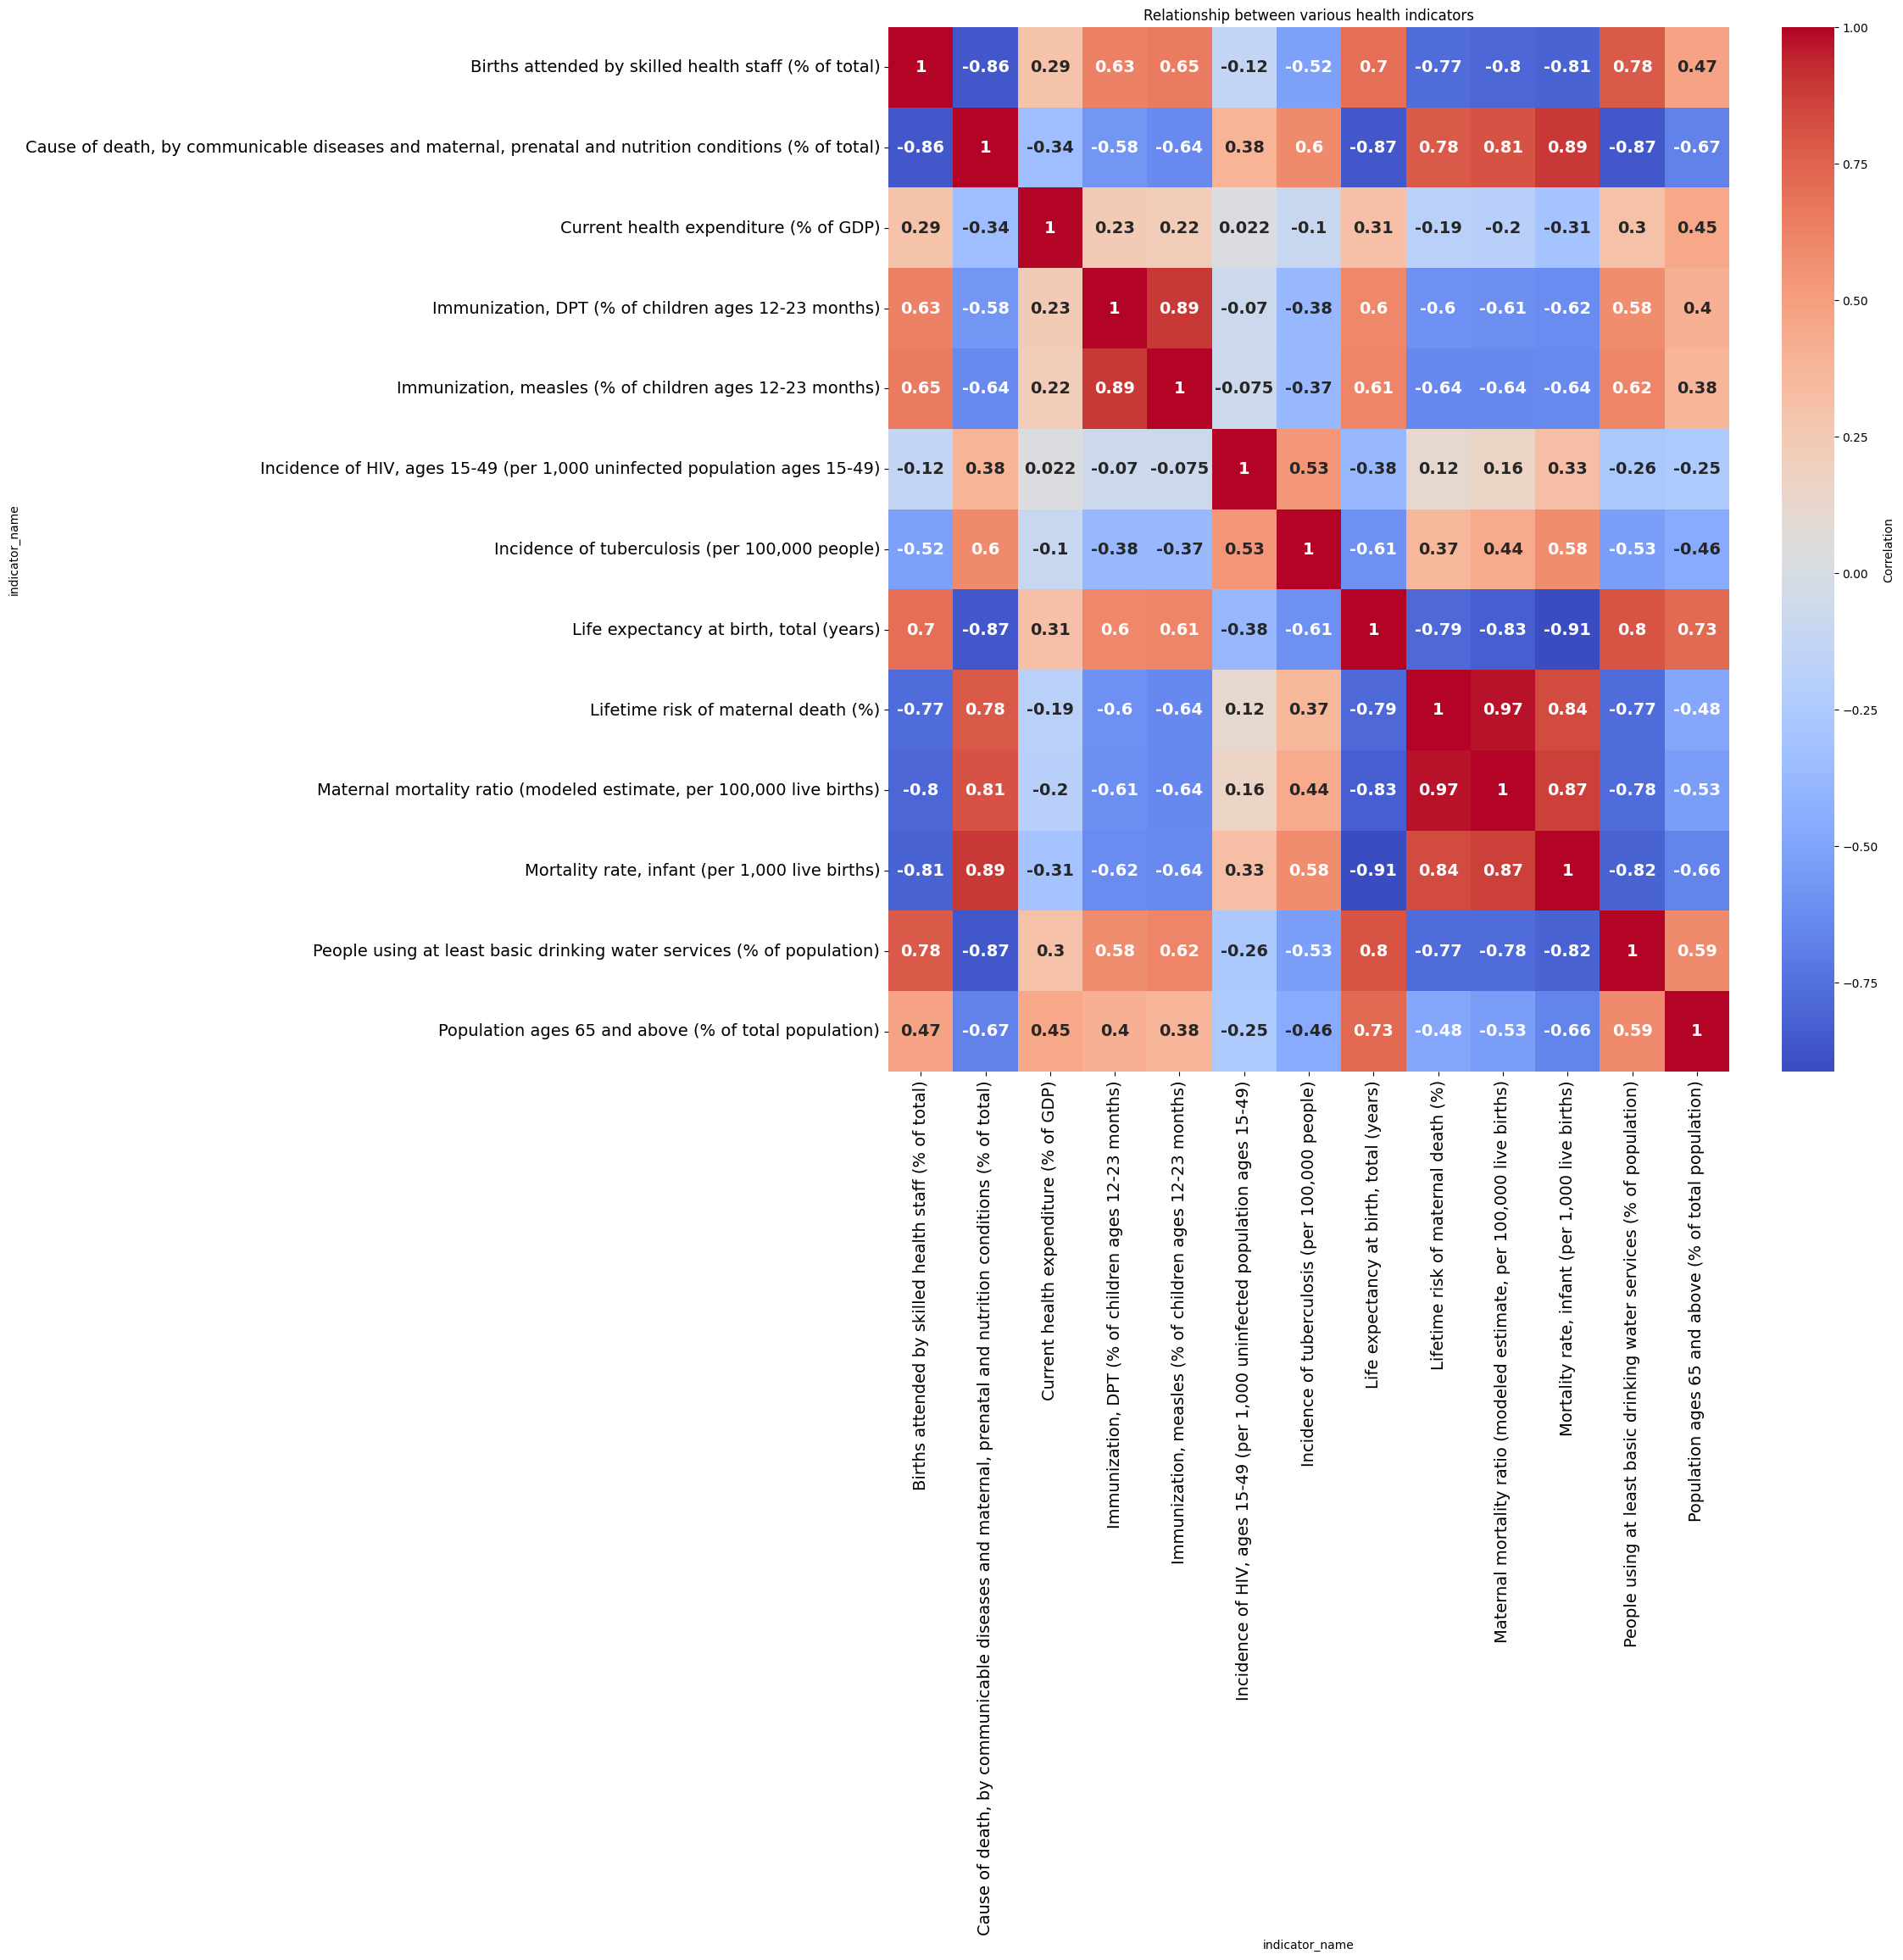

In [ ]:
df_wide = health.pivot_table(index=["country_value","year"],
                             columns="indicator_name",
                             values="value"
                             )
corr= df_wide.corr()
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(16,16), facecolor="none")
ax= sns.heatmap(
    corr,
    annot=True,
    cmap= "coolwarm",
    cbar_kws= {"label":"Correlation"},
    annot_kws= {"fontsize":14, "fontweight":"bold"}
)
plt.title("Relationship between various health indicators")

ax.tick_params(axis="x",labelsize=14)
ax.tick_params(axis="y",labelsize=14)
plt.show()

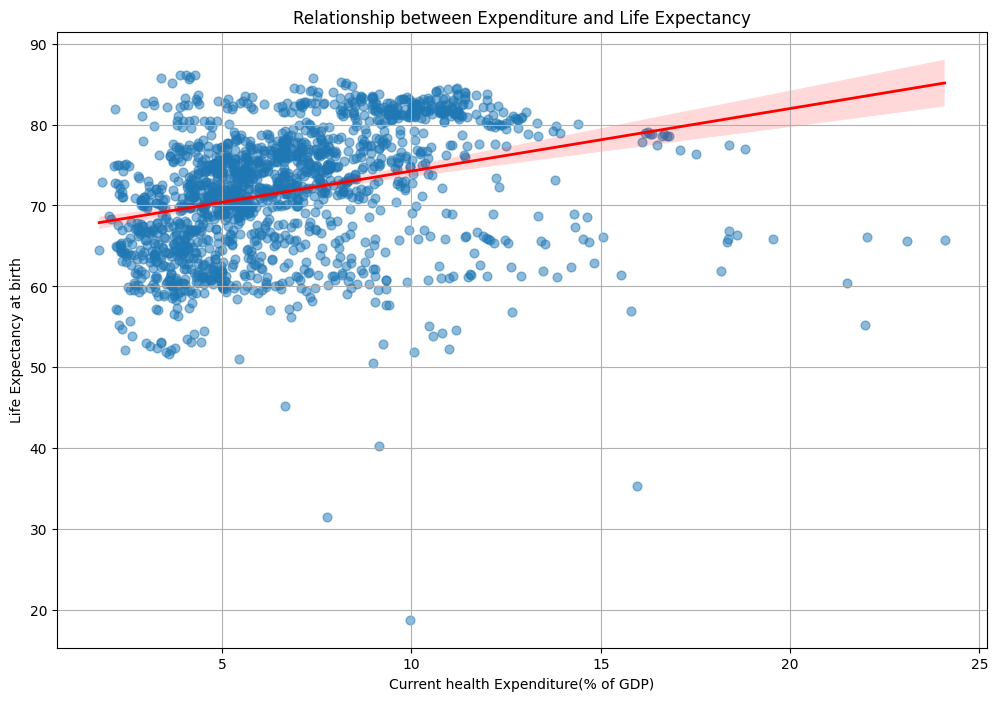

In [64]:
df_pivot= health.pivot(index=["country_value", "year"], columns="indicator_name", values="value").reset_index()

plt.figure(figsize=(12,8), facecolor="none")

ax=sns.regplot(data=df_pivot,
               x="Current health expenditure (% of GDP)",
               y="Life expectancy at birth, total (years)",
               scatter_kws= {"alpha":0.5, "s":40},
               line_kws={"color":"red","lw":2}
               )

plt.title("Relationship between Expenditure and Life Expectancy")
plt.xlabel("Current health Expenditure(% of GDP)")
plt.ylabel("Life Expectancy at birth")
plt.grid(True)
plt.show()

In [65]:
economic.to_csv("economic.csv")
labour_market.to_csv("labour_market.csv")
trade.to_csv("trade.csv")
poverty.to_csv("poverty.csv")
environment.to_csv("environment.csv")
health.to_csv("health.csv")
technology.to_csv("technology.csv")